In [1]:
#vector/matrix library
import numpy as np

#data frame library (similar to R)
import pandas as pd

#visualization library
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#regular expression library for data cleasning
import re

In [29]:
#paths to csv files

path_customers = "experimenting/raw/klantenV2.csv"

# 1. Customers

#### 1. Create a dataframe of the customer data

Fields in the Data Warehouse: (missing in csv)
* customer_id
* zipcode
* country
* salesrep_id
* closing_day
* creation_date

HINT: The CSV file dumps use UTF-16 character encoding, ignoring this will make the file unreadable

In [30]:
colnames = ['customer_id', 'zipcode', 'country', 'salesrep_id', 'closing_day', 'creation_date']

df_customers = pd.read_csv(path_customers, encoding='utf-16', header=None, names=colnames)
df_customers.head(n=5)

,customer_id,zipcode,country,salesrep_id,closing_day,creation_date
0,74236,8792,BE,128.0,1111111.0,7/05/2009 1:09:21
1,74246,8750,BE,44.0,1111111.0,7/05/2009 1:09:21
2,74247,8750,BE,44.0,1111111.0,7/05/2009 1:09:22
3,74249,8750,BE,63.0,1111111.0,7/05/2009 1:09:22
4,74263,8750,BE,44.0,1111111.0,7/05/2009 1:09:22


#### 2. Dataset characteristics

1. How many records and how many features are in train and test sets?
2. Are there duplicates in the data (customer_id), merge them appropriately!
3. Missing data: are there NaN values in the data. 
4. How many different countries are in the dataset?
5. Zipcodes: data quality is not very good: Clean the data using regular expressions!
6. The dataframe is only fully cleaned once the datatypes have been set: zipcode is an integer, creation_date is a datetime object => cast them as a final step


- HINT1: pd.isnull()
- HINT2: .drop() function, keep in mind that DFs are immutable (new DF created), avoid using inplace=True as it is not idempotent.
- HINT3: pandas has a duplicated() function
- HINT4: describe() function gives you a dataframe summary



In [35]:
#1
print(str(df_customers.shape[0]) + " customers")

23117 customers


In [36]:
df_customers.describe()

,customer_id,salesrep_id,closing_day
count,23117.000000,16640.000000,23108.0
mean,694030.095298,212.416106,1111111.0
std,306179.901771,186.899117,0.0
min,0.000000,2.000000,1111111.0
25%,500673.000000,61.000000,1111111.0
50%,856592.000000,222.000000,1111111.0
75%,901376.000000,290.000000,1111111.0
max,999998.000000,999.000000,1111111.0


(23117, 6)

In [43]:
#2
#how many duplicates?
print(df_customers
          .duplicated(subset=['customer_id'])
          .sum()
     )

2


In [45]:
mask = df_customers.duplicated(subset=['customer_id'], keep=False)
df_customers[mask]

,customer_id,zipcode,country,salesrep_id,closing_day,creation_date
303,840001,3012,BE,14.0,1111111.0,5/12/2008 16:05:27
2578,627118,3000,BE,14.0,1111111.0,7/05/2009 1:20:50
15913,840001,3000,BE,NaN,NaN,4/02/2010 15:53:48
16762,627118,3000,BE,NaN,NaN,17/02/2010 16:12:27


In [46]:
df_customers2 = df_customers.drop([16762, 15913], axis=0)

In [47]:
#3 Missing Data

mask = df_customers2.isnull().any(axis=1)
print(df_customers2[mask].shape)
df_customers2[mask].head(n=10)

(6477, 6)


,customer_id,zipcode,country,salesrep_id,closing_day,creation_date
16,144286,9770,BE,NaN,1111111.0,7/05/2009 1:10:31
19,144294,9770,BE,NaN,1111111.0,7/05/2009 1:10:31
33,164347,9520,BE,NaN,1111111.0,7/05/2009 1:10:53
70,144313,9680,BE,NaN,1111111.0,7/05/2009 1:10:33
71,144314,9690,BE,NaN,1111111.0,7/05/2009 1:10:33
72,144316,9690,BE,NaN,1111111.0,7/05/2009 1:10:34
85,164441,9620,BE,NaN,1111111.0,7/05/2009 1:10:56
87,164452,9620,BE,NaN,1111111.0,7/05/2009 1:10:57
181,144551,9790,BE,NaN,1111111.0,7/05/2009 1:10:41
182,144556,9790,BE,NaN,1111111.0,7/05/2009 1:10:41


In [48]:
print("Sales rep doesn't seem valuable to use as a feature, so let's get rid of it as it is often missing!")
df_customers3 = df_customers2.drop('salesrep_id', axis=1)

Sales rep doesn't seem valuable to use as a feature, so let's get rid of it as it is often missing!


In [49]:
mask = df_customers3.isnull().any(axis=1)
print(df_customers3[mask].shape)
df_customers3[mask].head(n=20)

(10, 5)


,customer_id,zipcode,country,closing_day,creation_date
15034,410,NaN,BE,1111111.0,27/08/2010 13:26:31
15035,401,NaN,BE,1111111.0,27/08/2010 13:23:09
16020,409,NaN,BE,1111111.0,27/08/2010 13:25:58
20789,429,5300,BE,NaN,9/11/2017 10:35:15
22587,426,8840,BE,NaN,31/05/2017 15:43:47
23016,432,1812,NL,NaN,20/02/2018 9:23:22
23017,435,2636,NL,NaN,20/02/2018 9:37:56
23113,431,7497,NL,NaN,14/02/2018 13:02:56
23114,433,7561,NL,NaN,20/02/2018 9:28:14
23115,434,9041,NL,NaN,20/02/2018 9:36:18


In [50]:
print("3 customers have no zipcode, these will have to be dropped")
print("7 records have no closing day, substitute with a reasonable value")

3 customers have no zipcode, these will have to be dropped
7 records have no closing day, substitute with a reasonable value


In [51]:
df_customers3['closing_day'].value_counts()

1111111.0    23108
Name: closing_day, dtype: int64

In [52]:
print("closing day is always the same so we can also get rid of it")
df_customers4 = df_customers3.drop('closing_day', axis=1)

closing day is always the same so we can also get rid of it


40 countries in the customer set


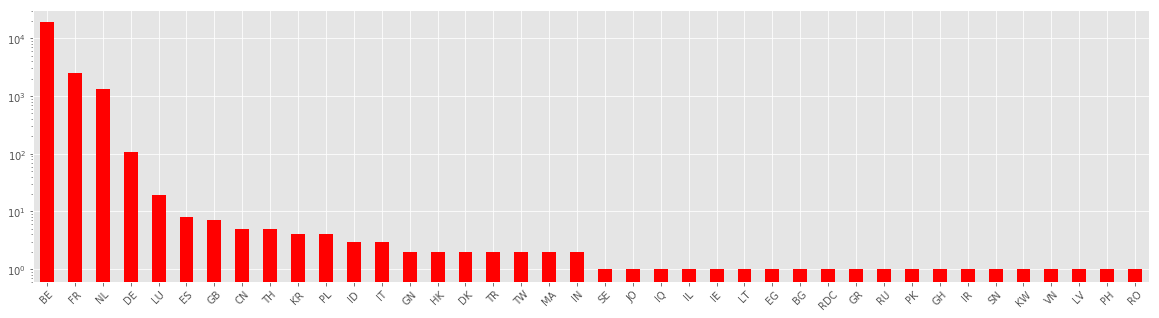

In [58]:
#4 Different countries in dataset?

vc = df_customers4['country'].value_counts()
print(str(len(vc)) + " countries in the customer set")
vc.plot(kind='bar', figsize=(20,5), logy=True, color='red', rot=45)

In [59]:
#5 clean the zipcode with regex 
zipFR = "FR 59265"
zipNL = "NL 4115 LN"
zipBE = '8700'

match = re.search('(\d+)', zipBE)
if match is not None:
    print(match.group(1))


def cleanZip(z):
    pattern = '(\d+)'
    match = re.search(pattern, str(z))
    
    if match is not None:
        return int(match.group(1))
    else:
        return -1
    
    
    
df_customers4['zip_clean'] = df_customers4['zipcode'].apply(cleanZip)

8700


In [60]:
mask = df_customers4['zip_clean'] < 0

df_customers4[mask]

df_customers5 = pd.DataFrame(df_customers4[~mask]).drop('zipcode', axis=1)

In [61]:
print(df_customers4.shape)
print(df_customers5.shape)

(23115, 5)
(23112, 4)


In [62]:
#casting to datetime and int

In [63]:
df_customers5.dtypes

customer_id       int64
country          object
creation_date    object
zip_clean         int64
dtype: object

In [64]:
#later ontdekt: dayfirst is belangrijk!!! eerste datums zijn 7 mei 2009, zonder dayfirst is het 5 juli 2009!!

df_customers5['creation_date'] = pd.to_datetime(df_customers5['creation_date'], dayfirst=True)

In [65]:
df_customers5.head(n=3)

,customer_id,country,creation_date,zip_clean
0,74236,BE,2009-05-07 01:09:21,8792
1,74246,BE,2009-05-07 01:09:21,8750
2,74247,BE,2009-05-07 01:09:22,8750


In [66]:
df_customers5.to_csv('experimenting/cleaned/customers_cleaned.csv', header=True, index=False, sep='\t', encoding='utf-8')

In [67]:
print(df_customers.shape)
print(df_customers5.shape)

(23117, 6)
(23112, 4)
